# Solution : Projet de prédiction de prix de vente de maisons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

pd.set_option('display.max_columns', 500)

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('../data/AmesHousing.tsv', delimiter = '\t')

In [3]:
print(data.shape)
print(len(str(data.shape))*'-')
print(data.dtypes.value_counts())
data.head()

(2930, 82)
----------
object     43
int64      28
float64    11
Name: count, dtype: int64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    features = numeric_train.columns.drop("SalePrice")
    
    # Entrainement
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    
    # Prédiction
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [5]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

57088.25161263909

## Traitement des caractéristiques

1. Toutes les colonnes: supprimer celles qui ont 5% ou plus de valeurs manquantes pour le moment.

In [7]:
num_missing = data.isnull().sum()

# Filtrer l'objet Series sur les colonnes contenant >5% de valeurs manquantes
drop_missing_cols = num_missing[(num_missing > len(data)/20)].sort_values()

# Supprimer ces colonnes dans le DataFrame. Noter l'utilisation de l'accesseur .index
data = data.drop(drop_missing_cols.index, axis=1)
data.shape[1]

70

2. Colonnes texte: supprimer toute colonne contenant au moins une valeur manquante pour le moment.

In [8]:
text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(
    ascending=False)

# Filtrer l'objet Series sur les colonnes contenant au moins une valeur manquante
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
data = data.drop(drop_missing_cols_2.index, axis=1)
data.shape[1]

64

3. Colonnes numériques: pour les colonnes contenant des valeurs manquantes, remplacer par la valeur la plus fréquente de la colonne

In [8]:
# Calculer le nombre de valeurs manquantes colonne par colonne
num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()

fixable_numeric_missing_cols = num_missing[(num_missing < len(data)/20) & 
                                   (num_missing > 0)].sort_values()
fixable_numeric_missing_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [9]:
# Calculer la valeur la plus commune pour chaque colonne.
replacement_values_dict = data[fixable_numeric_missing_cols.index].mode().to_dict(
    orient='records')[0]  # on utilise le mode pour prendre le plus fréquent valeurs
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [10]:
# Remplacer les valeurs manquantes.
data = data.fillna(replacement_values_dict)

## Vérifier que toutes les colonnes ont bien 0 valeur manquante
data.isnull().sum().value_counts()

0    64
Name: count, dtype: int64

Quelles nouvelles caractéristiques pouvons-nous créer pour mieux capturer les informations contenues dans certaines caractéristiques?

In [11]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [12]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [13]:
# Créer 2 nouvelles colonnes
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

In [14]:
# Supprimer les lignes avec des valeurs négatives pour ces nouvelles caractéristiques
data = data.drop([1702, 2180, 2181], axis=0)

In [15]:
# Plus besoin des colonnes de l'année d'origine
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

Supprimer les colonnes qui:
- Ne sont pas utiles pour le Machine Learning
- Fuite des données au sujet de la vente finale (cf. documentation dataset)

In [16]:
# Supprimer les colonnes qui ne sont pas utiles pour le ML
data = data.drop(["PID", "Order"], axis=1)

# Supprimer les colonnes qui font fuiter des informations sur la vente finale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [17]:
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,189900,13,12


In [18]:
def transform_features(df, percent_missing=0.05):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)*percent_missing)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(
        ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)*percent_missing) & 
                                       (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(
        orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", 
                  "Year Remod/Add"], axis=1)
    
    return df


def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    features = numeric_train.columns.drop("SalePrice")
    
    # Entrainement
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    
    # Prédiction
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [20]:
data = pd.read_csv('88 - dataset-projet-guide-pre-diction-prix-de-vente-maisons/AmesHousing.tsv', delimiter = '\t')
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

55275.367312413066

## Sélection des caractéristiques

In [21]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12


In [22]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2         0.006127
Misc Val             0.019273
Yr Sold              0.030358
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice 

In [23]:
# Ne gardons que les colonnes avec un coefficient de corrélation supérieur à 0.4 
# (arbitraire, à tester plus tard!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [24]:
# Supprimer les colonnes avec une corrélation inférieure à 0.4 avec SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)
transform_df.shape[1]

39

Quelles colonnes catégoriques devrions-nous garder?

In [25]:
# Créer une liste de noms de colonne à partir de la documentation qui sont censés être 
# catégoriques
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley",
                    "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", 
                    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", 
                    "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type",
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [26]:
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)
transform_cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [27]:
# Combien de valeurs uniques dans chaque colonne catégorique?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

# Limite arbitraire de 10 valeurs uniques (expérimentation)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [28]:
# Sélectionner uniquement les colonnes de texte restantes et convertissez-les en catégories
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

In [29]:
# Créer des colonnes factices et ajouter les au DataFrame
transform_df = pd.concat([
    transform_df,
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

In [30]:
transform_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Sto

In [31]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour",
                        "Lot Config", "Neighborhood", "Condition 1", "Condition 2", 
                        "Bldg Type", "House Style", "Roof Style", "Roof Matl","Exterior 1st",
                        "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                        "Central Air", "Garage Type","Misc Feature", "Sale Type", 
                        "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
            
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

## Entrainement et test

In [32]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])
        
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        
        return avg_rmse

36623.535629104714
30924.75147660502
[36187.259530456926, 29306.32679659818]
[36647.46248728455, 30476.571698041167, 32099.124301594424]
[28940.521465062877, 33094.48954848689, 32006.810133787814, 39140.185364032855]
[33760.06292538199, 30319.066067297063, 41292.165883826, 30052.954193031386, 31085.821525077416]
[30952.73564903668, 31069.850064160237, 29223.500256558265, 27906.718816842873, 35957.6411684677, 41863.691944620696]
[31074.121257582057, 29712.738415893204, 30306.070460976378, 31232.480205061413, 30196.150341714703, 34574.74965694534, 45139.6994604764]
[36194.52184842429, 34754.80831315006, 31234.520577948384, 24597.878484170058, 29033.053774425138, 29461.508195832277, 45452.711135906604, 31454.328714684376]
[30811.667357556227, 34622.03673491463, 28196.799183495026, 27311.55566077974, 47067.060940929856, 30373.2064325503, 35771.03964138483, 32778.327732264865, 29827.31600751433]
[28814.732080299986, 28593.384853901087, 53027.9500190374, 28276.176112437013, 32532.28972533544

[20896.200165489325, 76191.74035863066, 26610.204694398995, 28926.19243503686, 31065.750164467587, 28420.324875642404, 25335.486041699995, 25643.43812605277, 41959.06656115758, 32561.46838163293, 26781.896447606756, 24892.774787357048, 31194.918101927775, 28264.810843425614, 35705.70538808143, 27106.97074208823, 26827.76145623876, 28111.86128711698, 29801.41935703839, 49404.77917665666, 35795.615542624575, 28875.496180519753, 24667.853036160785, 50459.54978352147, 29515.870574712608, 24338.396685606916, 28367.27735497019, 33707.40561376151, 25800.45369217497, 31011.377208768597, 25768.66414482221]
[37853.7887818637, 25613.447439918687, 35885.07470122046, 33125.11746994001, 40193.21281396156, 41664.931295922324, 24031.05809452541, 30278.34032309499, 79060.00819558778, 28770.964834613078, 28846.120986666385, 27234.747864565143, 26724.804585255984, 32343.616637714884, 35070.678921963605, 28389.29536207456, 25777.53006214333, 27408.70520034626, 25600.382093999226, 25501.750890492178, 26457

[26568.032801678, 43445.17547257656, 28287.1053867631, 28954.229116892933, 34471.574298200765, 35966.660701982415, 23189.321491884555, 25744.5311060574, 23794.37620218553, 26540.3551152468, 28018.236464113535, 29024.85332552095, 26010.623420681306, 29831.248628188878, 35437.26052387541, 27217.07964721994, 29665.79376432744, 28829.78312790772, 31230.56242382724, 28046.815007799654, 32822.807623111745, 34141.86904935316, 31445.671726361048, 28864.98110623741, 23596.43729939194, 91488.82900493604, 24044.63637260472, 26046.1057444905, 24794.23390756445, 24791.989604614388, 41300.82472715453, 30628.328926094313, 32421.025107607627, 30389.705206169434, 22762.91919021801, 37602.41650763299, 36431.59790066391, 28549.986417860353, 30553.131293577426, 39913.26880770266, 20952.6593344014, 35413.17293504684, 36739.9122018723]
[41278.86855441521, 25774.1413447865, 28129.20200851685, 27757.027420722196, 25316.54528648081, 28015.171171064983, 32266.15341914213, 34314.96800334267, 24725.483279379463, 

[28139.490190274915, 30660.880647374997, 32225.476172641804, 21081.728115593636, 23482.26101469557, 98388.90024778889, 32011.2562931751, 28703.5092953101, 31285.603658605552, 25173.602736607907, 24999.78322854923, 23667.043385804092, 31690.00424576677, 27144.60621370253, 30150.292332301415, 25712.964897666123, 24002.972599066372, 30478.01161590696, 30886.331930067277, 30680.961624159365, 28221.39967978318, 38408.202538605925, 27703.311036394214, 44692.28115924046, 25125.313898766726, 28163.965700135977, 29464.990169233297, 28505.7312145569, 25864.05884530704, 25896.12391057055, 25101.359870908713, 22108.22170962162, 49687.530439237475, 38557.8218445384, 33918.937275004086, 37556.61139196742, 25937.094021248206, 34160.89024024393, 36196.57729616454, 36715.01289550342, 43171.09814168287, 38257.29136231656, 23961.206277051675, 28530.292277025103, 27081.2473603764, 26820.244194977662, 22812.498952933816, 24719.30310388726, 27231.242320611793, 26413.548849022798, 35372.97391820639, 29039.92

[24857.829136147153, 33429.57199392827, 26706.77345795278, 30737.062006767632, 45314.30019694741, 26865.8673959441, 33112.88311169956, 39729.564535088124, 41297.365749790086, 24693.361663127358, 41384.66606189408, 33428.37241885948, 31059.303351252707, 37286.21580350142, 30925.134696002762, 38880.35250073642, 33233.52663123201, 25634.968014661656, 24781.522507879752, 27636.542924072968, 23581.284244443028, 102428.38484918015, 39352.57640005316, 18427.441378837648, 20264.996763104835, 25603.09927080781, 25717.333296351422, 38597.67767686339, 27570.600984851586, 25049.304710158867, 29230.61345358267, 29906.882197612256, 34233.635645188355, 23216.763830665495, 27342.56786976156, 26348.907398296386, 27474.75730482349, 52982.92220025093, 29592.857313744284, 19122.07449264699, 24186.218034604975, 39682.19308283791, 31411.67234506875, 24749.921308472, 40701.28080673967, 25251.084184014544, 25081.66640644863, 27926.912644494932, 33155.04568365696, 22643.52339494826, 23439.792903744896, 27356.8

[32366.570653766878, 20731.76645721873, 28312.899745123395, 26758.992238585495, 22097.606867345497, 48183.556432577025, 20720.072838745076, 29850.15436432479, 22999.999375845866, 30360.613293067814, 26510.492409934024, 20093.31290260698, 25921.563489613785, 30838.49150689975, 34818.01199175297, 25723.63210598535, 31462.6820658239, 25335.449470495732, 41075.66801851565, 22343.058476832204, 36726.90751973049, 26427.250822165635, 25318.679590507916, 23504.210830402277, 40202.9843616784, 24067.45950535862, 38564.51890485207, 26194.3758467842, 25957.66273661805, 20842.788829859604, 42177.39885527701, 45506.31225133224, 23958.839045888726, 27669.89610910055, 27556.70651027152, 21965.43971797045, 49530.89838705529, 22410.2080554943, 21938.242183335973, 29023.77975794176, 53961.84857165555, 32176.376920036244, 21524.140701502933, 36655.158989183794, 39590.16129160779, 109662.17064203313, 30115.920784571885, 24952.064567319696, 23867.5797646203, 35727.22616303243, 27251.8446872342, 24913.882399

[21684.006404994674, 23140.408341398117, 30486.32975356405, 21901.109216558365, 29121.68458984126, 39033.51880312278, 28368.02372290101, 28325.362437144064, 26013.929069363436, 27205.63107945164, 27980.043915710812, 26165.83470051161, 37873.77728881117, 29681.934734056355, 33985.97885261828, 22872.392030795043, 35038.38184578854, 41831.57548689815, 38084.78219387294, 22824.179718624597, 38741.20900192942, 43436.26809691524, 25413.5014045611, 30886.475061393478, 23963.284856751616, 37080.44332133296, 25550.01173165475, 19417.719860818946, 26291.88292204294, 50495.92297971723, 24103.72937990102, 27250.45797891124, 27124.820320626182, 29233.33303087313, 24598.06549192834, 19268.934304098202, 25961.364916619375, 25238.930900172516, 20971.16106619283, 115508.64203474291, 29621.094559453843, 25562.95523004014, 22637.03602891347, 20585.29698994064, 36858.80974334884, 41261.9711713405, 25521.862071641415, 24499.100370987562, 30094.46932061335, 28492.13278751694, 37383.97693645439, 24808.271301

[21266.6040253123, 52068.931797653044, 25711.619178607838, 24321.556467868457, 24793.402133676485, 30927.649259163525, 43612.337635941505, 22219.756516097124, 35389.035837888485, 29160.1817824252, 24289.546022203478, 23485.636718058806, 33609.82691755079, 27918.225660593365, 21197.217561252666, 28668.272348170383, 17998.289985129115, 28966.22965172385, 43132.25744265751, 31479.531383916816, 19798.433076589707, 31733.7490731615, 32326.45922251138, 31995.4986472746, 23647.67610408528, 26008.423755322478, 29487.92855907757, 27874.808625876518, 26524.632981869694, 22501.157077690073, 25466.797499295968, 36857.76281954553, 39797.95017009199, 17805.157637870292, 35625.48075736422, 23299.137861848692, 116744.65094546758, 29276.469136675074, 26758.326987752847, 28072.61682192537, 38622.86458994531, 43224.82564622303, 36986.545545034016, 30862.679038391627, 24549.398439732653, 25393.102000974457, 33149.116579120084, 24321.091814401483, 24574.54935493808, 28121.703134647512, 18877.09909423373, 2

[39228.05288005066, 33349.03577699853, 23676.598717367517, 26554.790954969023, 47768.42811310483, 25773.56224999135, 26625.891910542014, 31322.183298437365, 26822.793476036884, 26123.76473153625, 16239.07823328853, 23360.192053456565, 28145.347899542634, 24189.49514891459, 23745.389093634472, 22977.755106612418, 32731.235491140174, 21968.911618785405, 42222.66476623239, 21115.576278791334, 27351.0201054205, 40820.98233190916, 27856.918840882605, 23857.332612348073, 28732.468812998744, 28663.757335672628, 28587.75654773286, 25701.408518236996, 29072.302101659236, 28667.24828848404, 31468.592848850618, 24478.43425506941, 24582.70217626459, 39489.41087819902, 26783.498856715087, 35364.661632660376, 26961.282686603947, 53741.99145991949, 24177.918009190078, 29463.44378818553, 23521.04439160587, 51695.31452603816, 29713.838066688444, 25156.04454525728, 29311.70399882108, 32696.48265408741, 25625.18469479617, 27788.988606841554, 40315.140364548264, 26119.499360458525, 23705.51949235878, 2349

[26652.151654065266, 53591.12678007783, 26481.108524340994, 31244.292947028214, 28430.986290391986, 32970.359552845584, 20660.632938023256, 26979.17247593578, 29924.259799504398, 24933.939405925164, 31402.379354056975, 27822.18590040819, 33494.48685235417, 22462.032207417047, 20000.08312875392, 34076.30294766896, 47158.13773201609, 26219.311167496315, 35532.70583142937, 35678.33732321182, 22311.27708799174, 26780.407920541533, 25618.658802204875, 49185.121091259985, 26970.02435686614, 29588.68816961916, 27412.44905184146, 41450.4827775163, 19237.948186594596, 26205.605866638085, 24568.74797446476, 26152.76406592205, 45683.20614176236, 22683.732434917452, 22351.602742184277, 29037.581062394747, 47935.916201015185, 25213.98741642349, 21589.12161568981, 27394.580704328502, 31949.71668393661, 41504.835898465266, 23964.393000463653, 24864.124319190698, 48314.156968437725, 29251.848179055974, 24457.16839640676, 38309.499347070065, 31916.94529466753, 20865.035888133985, 32267.147174185524, 39

[41748.84738502867, 31642.15471248768, 31904.514192351646, 30034.669468447297, 36622.36764724161, 36786.939765129886, 39965.32738880701, 20598.43849053826, 27416.86040903492, 45206.4387738905, 44074.63273551981, 31732.46614735715, 30135.16636770472, 30247.06137673675, 19930.82428426738, 33993.265640906124, 40747.25584536759, 51047.01618121786, 25344.223960613723, 25438.447315044457, 20845.869937890835, 20258.059548394896, 32003.07680756951, 15157.063054742614, 30366.76603588202, 127469.34007446124, 34587.98153550757, 24752.104200774942, 24653.702049505922, 26572.67752240892, 25997.352055999585, 35707.9545785277, 28802.020672698553, 21865.32358545702, 28193.725258201433, 27931.0310182414, 38159.684827107994, 43148.26959286976, 31909.60042589053, 34686.09665016025, 23864.37565294407, 17549.352651613168, 33200.187927436506, 26714.82159599058, 25496.300991433865, 17418.199428349162, 45043.93569952068, 22826.875313624394, 32212.58818580533, 25627.760727348927, 16964.04385470685, 22011.18159

Text(0, 0.5, 'RMSE')

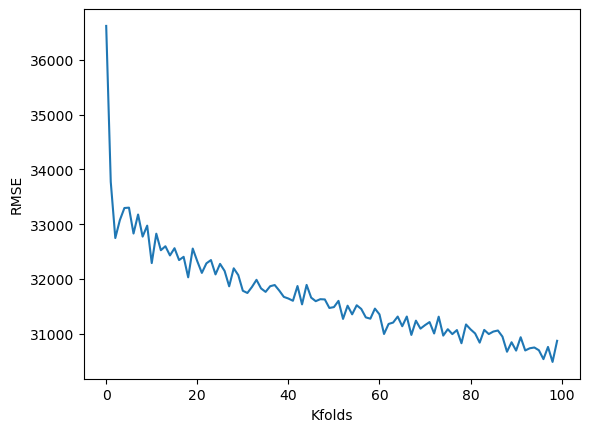

In [34]:
data = pd.read_csv('88 - dataset-projet-guide-pre-diction-prix-de-vente-maisons/AmesHousing.tsv', delimiter = '\t')

transformed_data = transform_features(data)
final_data = select_features(transformed_data)

results = []
for i in range(100):
    result = train_and_test(final_data, k=i)
    results.append(result)
    
x = [i for i in range(100)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')